In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set_style("darkgrid")

In [3]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [120]:
opioids = pd.read_csv('opioids.csv')
overdoses = pd.read_csv('overdoses.csv', thousands = ',')
prescriber = pd.read_csv('prescriber_cap.csv')

In [121]:
overdoses= overdoses[['Abbrev', 'Population', 'Deaths']]

In [122]:
#Merge Overdoses DF on Prescriber DF
prescriber = pd.merge(prescriber, overdoses, on=['Abbrev'], how='outer')

In [7]:
prescriber

,NPI,Gender,Abbrev,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber,SumOpi,TotPresc,NonOpi,Region,Population,Deaths
0,1710982582,M,TX,Dentist,0,0,0,0,0,0,...,0,0,0,1,17,29,12,South,26448193,2601
1,1023260569,M,TX,Optometry,0,0,0,0,0,0,...,0,0,0,0,0,144,144,South,26448193,2601
2,1659334472,M,TX,General Surgery,0,0,0,0,0,0,...,0,0,0,1,17,17,0,South,26448193,2601
3,1952598419,F,TX,Hematology/Oncology,0,0,16,0,0,0,...,0,0,12,1,155,734,579,South,26448193,2601
4,1043399322,M,TX,Urology,0,23,0,0,0,0,...,0,0,0,1,132,1222,1090,South,26448193,2601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,1841302700,M,SD,Optometry,0,0,0,0,0,0,...,0,0,0,0,0,223,223,Central,844877,63
24755,1336293323,F,SD,Nurse Practitioner,20,0,0,0,0,0,...,0,52,59,0,0,1322,1322,Central,844877,63
24756,1851630727,M,SD,Physician Assistant,13,0,0,0,0,0,...,0,0,0,1,66,1191,1125,Central,844877,63
24757,1447239942,F,SD,Physician Assistant,0,0,0,0,0,0,...,0,0,0,0,0,24,24,Central,844877,63


## Linear Regression - Statistical

In [194]:
fit1 = ols('TotPresc ~ C(Specialty)', data=prescriber).fit()

fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               TotPresc   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     177.6
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           2.18e-40
Time:                        14:19:30   Log-Likelihood:            -2.3406e+05
No. Observations:               24759   AIC:                         4.681e+05
Df Residuals:                   24757   BIC:                         4.682e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1035.9400     31.899     32.476      0.000     973.416    1098.464
C(Gender)[T.M]   539.1562     40.452     13.328      0.000     459.868     618.444
==============================================================================
Omnibus:                    24732.614   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1617610.023
Skew:                           4.912   Prob(JB):                         0.00
Kurtosis:                      41.360   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [268]:
presc_model_gender = ols('TotPresc ~ C(Gender)', data=prescriber).fit()

presc_model_gender_summary = presc_model.summary()

HTML(
(presc_model_gender_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [269]:
presc_model_state = ols('TotPresc ~ C(Abbrev)', data=prescriber).fit()

presc_model_state_summary = presc_model.summary()

HTML(
(presc_model_state_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [148]:
# again, invoke statsmodel's formula API using the below syntax
fit1_presc_gen_model = ols("""TotPresc~ C(Specialty) 
                                            + C(Gender) 
                                            + C(Abbrev)""", data=prescriber).fit()
# summarize our model
fit1_presc_gen_model_summary = fit1_presc_gen_model.summary()
HTML(fit1_presc_gen_model_summary.as_html())

## Linear Regression - ML

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [285]:
presc_ml = prescriber[['TotPresc', 'Specialty', 'Abbrev', 'Gender', 'Region', 'Population']]

presc_ml_X = pd.get_dummies(data=presc_ml, drop_first=True)

presc_ml_X

,TotPresc,Population,Specialty_Allergy/Immunology,Specialty_Anesthesiology,Specialty_Behavioral Analyst,Specialty_CRNA,Specialty_Cardiac Electrophysiology,Specialty_Cardiac Surgery,Specialty_Cardiology,Specialty_Certified Clinical Nurse Specialist,...,Abbrev_VA,Abbrev_VT,Abbrev_WA,Abbrev_WI,Abbrev_WV,Abbrev_WY,Gender_M,Region_North East,Region_South,Region_West
0,29,26448193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,144,26448193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,17,26448193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,734,26448193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1222,26448193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,223,844877,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24755,1322,844877,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24756,1191,844877,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24757,24,844877,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
presc_ml_X

,TotPresc,Population,Specialty_Allergy/Immunology,Specialty_Anesthesiology,Specialty_Behavioral Analyst,Specialty_CRNA,Specialty_Cardiac Electrophysiology,Specialty_Cardiac Surgery,Specialty_Cardiology,Specialty_Certified Clinical Nurse Specialist,...,Abbrev_VA,Abbrev_VT,Abbrev_WA,Abbrev_WI,Abbrev_WV,Abbrev_WY,Gender_M,Region_North East,Region_South,Region_West
0,29,26448193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,144,26448193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,17,26448193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,734,26448193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1222,26448193,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,223,844877,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24755,1322,844877,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24756,1191,844877,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
24757,24,844877,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


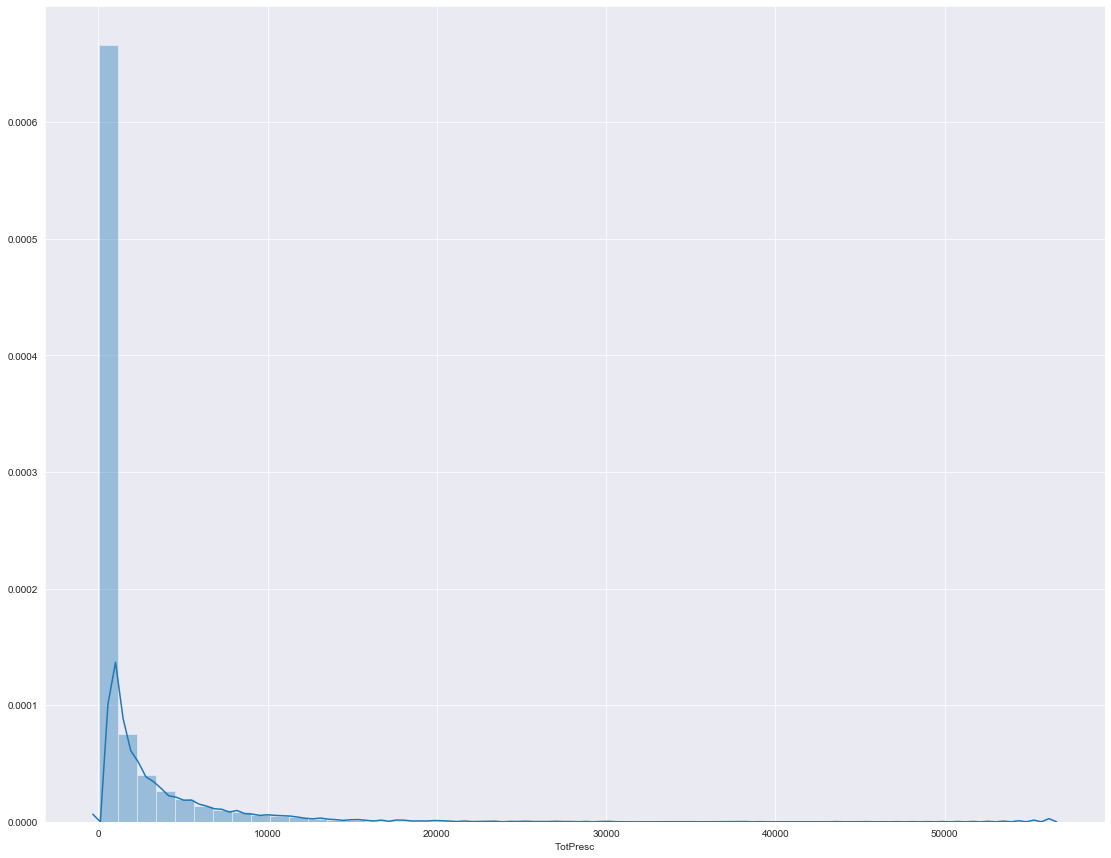

In [294]:
plt.figure(figsize=(19, 15))
sns.distplot(presc_ml_X['TotPresc'])

In [293]:
presc_ml_X.corr()

,TotPresc,Population,Specialty_Allergy/Immunology,Specialty_Anesthesiology,Specialty_Behavioral Analyst,Specialty_CRNA,Specialty_Cardiac Electrophysiology,Specialty_Cardiac Surgery,Specialty_Cardiology,Specialty_Certified Clinical Nurse Specialist,...,Abbrev_VA,Abbrev_VT,Abbrev_WA,Abbrev_WI,Abbrev_WV,Abbrev_WY,Gender_M,Region_North East,Region_South,Region_West
TotPresc,1.000000,-0.015910,-0.019745,-0.011243,-0.002789,-0.006717,-0.002918,-0.009273,0.072456,-0.005477,...,-0.013230,-0.007515,-0.021939,-0.005930,0.013480,0.003188,0.084406,-0.038835,0.073887,-0.042821
Population,-0.015910,1.000000,0.001685,0.003451,0.003752,-0.012187,-0.005542,-0.005150,-0.009005,-0.019410,...,-0.076509,-0.060322,-0.090712,-0.100404,-0.095575,-0.046257,0.014512,-0.111386,-0.004923,0.333492
Specialty_Allergy/Immunology,-0.019745,0.001685,1.000000,-0.005203,-0.000442,-0.001082,-0.002380,-0.001926,-0.011670,-0.003700,...,0.010581,0.007847,0.000858,0.002523,0.006825,-0.002725,0.015658,0.000215,-0.008128,0.006175
Specialty_Anesthesiology,-0.011243,0.003451,-0.005203,1.000000,-0.000476,-0.001166,-0.002564,-0.002075,-0.012572,-0.003986,...,-0.008863,-0.003841,-0.007982,-0.006862,-0.000663,-0.002935,0.039365,0.002549,-0.001194,-0.002492
Specialty_Behavioral Analyst,-0.002789,0.003752,-0.000442,-0.000476,1.000000,-0.000099,-0.000218,-0.000176,-0.001067,-0.000338,...,-0.001041,-0.000326,-0.000983,-0.000911,-0.000572,-0.000249,0.004956,0.010516,-0.004132,-0.003487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Abbrev_WY,0.003188,-0.046257,-0.002725,-0.002935,-0.000249,-0.000610,-0.001343,-0.001087,-0.006584,-0.002088,...,-0.006422,-0.002011,-0.006062,-0.005617,-0.003529,1.000000,0.015681,-0.023695,-0.025492,0.071448
Gender_M,0.084406,0.014512,0.015658,0.039365,0.004956,-0.009263,0.021835,0.021611,0.090153,-0.063574,...,-0.011135,-0.003938,-0.017331,-0.013452,0.010498,0.015681,1.000000,-0.035190,0.041583,-0.000417
Region_North East,-0.038835,-0.111386,0.000215,0.002549,0.010516,-0.003548,-0.010026,-0.016749,0.014716,0.012496,...,0.271040,0.084891,-0.093439,-0.086589,-0.054402,-0.023695,-0.035190,1.000000,-0.392963,-0.331643
Region_South,0.073887,-0.004923,-0.008128,-0.001194,-0.004132,0.006911,0.008741,0.013897,0.012035,-0.011319,...,-0.106509,-0.033359,-0.100526,-0.093156,0.138440,-0.025492,0.041583,-0.392963,1.000000,-0.356796


In [298]:
X = presc_ml_X.drop(['TotPresc'], axis=1)
y = presc_ml_X['TotPresc']

In [299]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [300]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [301]:
predictions = lm.predict(X_test)

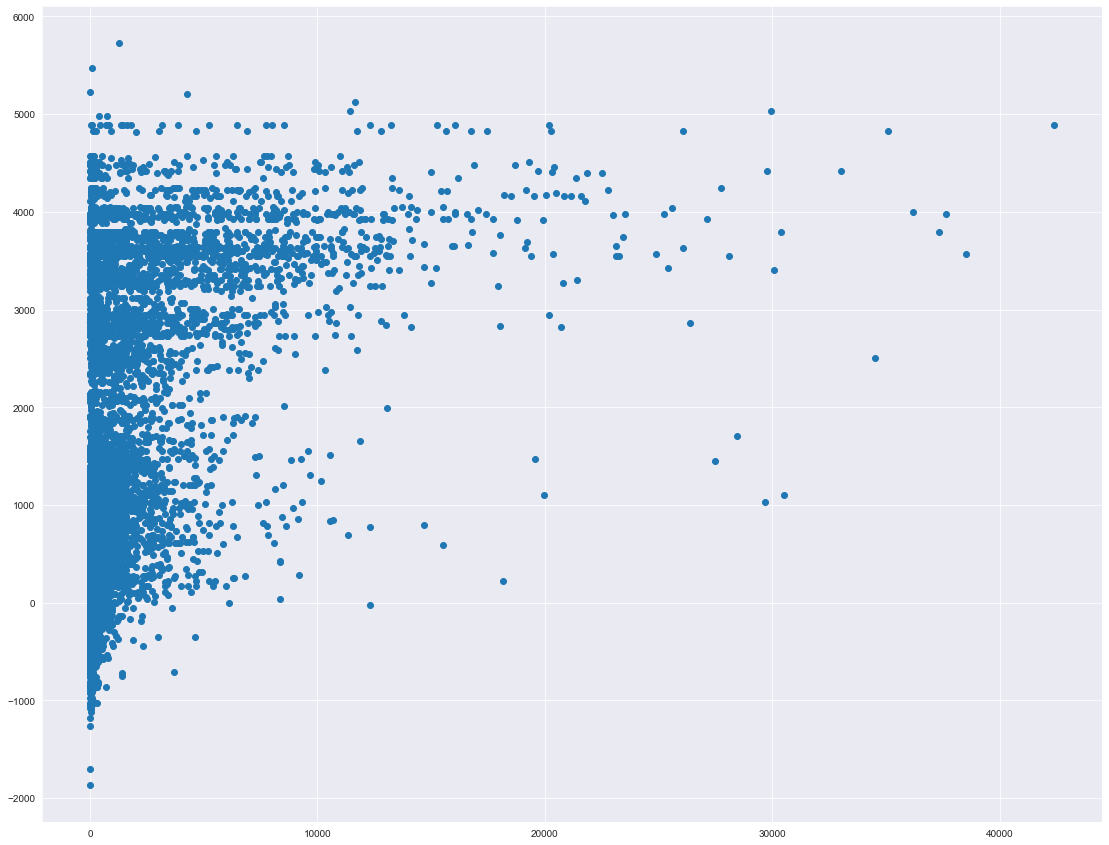

In [302]:
plt.figure(figsize=(19, 15))
plt.scatter(y_test,predictions)

In [321]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [322]:
X = prescriber.iloc[:,:-1]
calc_vif(X)

TypeError: unsupported operand type(s) for -: 'str' and 'str'